# Motor Safety in Los Angeles Metro Area

<img src="./Images/IntroImage1.jpg" alt="Drawing" align="left" style="width: 500px;"/><br>

What is the first concern you have when looking for a house?<br>
What is the first thought that crosses your mind when traveling to a new place?<br>
What is the first consideration that you make when parking your car?<br>
Safety!

Safety is a crucial factor in determining our everyday actions. In fact, many of the decisions we make revolve around the key notion of **"safety"**.

Our project highlights this idea as we explore the vehicular safety in Los Angeles Metro Area.

The potential use cases for this project include:
- Locating safe neighborhoods while house-hunting
- Helping home and motor insurance companies in evaluating appropriate premiums
- Determining safe locations for parking vehicles
- Recommending safe times and places to tourists

The Los Angeles Police Department has released data from the city from 2010 to present which details the location and type of crime for each crime incident. This data was scraped (Appendix scraper.py) and loaded into a pandas DataFrame which can be seen below:

In [114]:
#import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
#load data from csv to DataFrame
crime_data_file = "./Data/Crime_Data_from_2010_to_Present.csv"
crime_data = pd.read_csv(crime_data_file,parse_dates=['Date Reported','Date Occurred'])
crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,2013-03-14,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,2010-01-25,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,2013-03-19,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,2010-11-11,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,2014-01-11,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


## Exploratory Data Analysis 

To understand the data, we first obtained some statistics:

In [3]:
#statistics for every column
crime_data.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.705094e+06,1.705094e+06,1.705094e+06,1.705094e+06,1.705094e+06,1.568081e+06,1.705006e+06,564873.000000,1.705088e+06,108192.000000,2445.000000,80.000000
mean,1.385812e+08,1.363462e+03,1.114144e+01,1.160522e+03,5.068571e+02,3.597204e+01,3.120247e+02,370.765997,5.067278e+02,953.103002,970.221677,969.462500
std,2.401780e+07,6.465884e+02,5.993539e+00,5.993485e+02,2.105156e+02,1.681131e+01,2.105535e+02,113.853506,2.104252e+02,124.747281,88.896149,91.413505
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,1.000000e+01,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000
25%,1.203252e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.300000e+02,2.300000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.408049e+08,1.430000e+03,1.200000e+01,1.204000e+03,4.400000e+02,3.400000e+01,2.100000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.608154e+08,1.900000e+03,1.600000e+01,1.675000e+03,6.260000e+02,4.800000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.560000e+02,9.900000e+01,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


In [4]:
#find count of null values in each column
crime_data.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        392
MO Codes                   185027
Victim Age                 137013
Victim Sex                 157166
Victim Descent             157203
Premise Code                   88
Premise Description          3259
Weapon Used Code          1140221
Weapon Description        1140222
Status Code                     2
Status Description              0
Crime Code 1                    6
Crime Code 2              1596902
Crime Code 3              1702649
Crime Code 4              1705014
Address                         0
Cross Street              1421730
Location                        9
dtype: int64

After reviewing the data, we decided to delete certain columns which would not be required by our analysis and drop the rows which had null values (as the number of null value rows were negligible compared to the amount of total data).

In [5]:
trimmed_crime_data = crime_data.drop(['Crime Code 1', 'Crime Code 2','Crime Code 3','Crime Code 4','Cross Street','Weapon Used Code','Weapon Description','DR Number', 'Area Name', 'MO Codes'],axis=1)
trimmed_crime_data = trimmed_crime_data.dropna()
trimmed_crime_data = trimmed_crime_data[trimmed_crime_data['Victim Sex']!= 'H']
trimmed_crime_data.isnull().sum() #verify that no null values remain
# trimmed_crime_data.to_csv("Clean_data.csv") #trimmed data made into csv 

Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Reporting District        0
Crime Code                0
Crime Code Description    0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Status Code               0
Status Description        0
Address                   0
Location                  0
dtype: int64

In [6]:
trimmed_crime_data.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,Address,Location
0,2013-03-14,2013-03-11,1800,12,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AO,Adult Other,6300 BRYNHURST AV,"(33.9829, -118.3338)"
4,2014-01-11,2014-01-04,2300,21,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,7200 CIRRUS WY,"(34.2009, -118.6369)"
5,2013-01-08,2013-01-08,1400,1,111,110,CRIMINAL HOMICIDE,49.0,F,W,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,600 N HILL ST,"(34.0591, -118.2412)"
9,2013-03-29,2013-01-15,800,9,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,O,203.0,OTHER BUSINESS,IC,Invest Cont,7200 SEPULVEDA BL,"(34.2012, -118.4662)"
12,2013-02-22,2013-02-13,1200,12,1266,440,THEFT PLAIN - PETTY ($950 & UNDER),42.0,M,H,108.0,PARKING LOT,IC,Invest Cont,82ND,"(33.9651, -118.2783)"


Above, we see that we have finally reduced to 16 columns of data describing each crime incident. Here is what each column tells us:
1. Date Reported - date that the crime was reported in YYYY-MM-DD format
2. Date Occurred – date that the crime occurred in YYYY-MM-DD format
3. Time Occurred – the time that the crime occurred in 2400 time format (24:00 => 2400)
4. Area ID – locality of Los Angeles that the crime occurred; encoded by an ID number
5. Reporting District – four-digit code that represents a sub-area within a geographic area
6. Crime Code – describes the intensity of the crime committed (1 is the most serious, 1000 is the least serious)
7. Crime Code Description – defines the crime code
8. Victim Age – age of victim
9. Victim Sex – gender of victim
10. Victim Descent – racial origin of victim
11. Premise Code – type of structure, vehicle, or location where the crime took place
12. Premise Description – define the premise code
13. Status Code – status of the crime case
14. Status Description – defines the status code
15. Address – street address of crime incident rounded to nearest hundred block
16. Location – latitude and longitude of the location where the crime occurred

Groupby objects were created to view the crime data by area, gender, ethnicity, and by crime code:

In [7]:
#creating groupby objects
crime_by_area = trimmed_crime_data.groupby(by='Area ID')
victims_by_gender = trimmed_crime_data.groupby(by='Victim Sex')
victims_by_ethnicity = trimmed_crime_data.groupby(by='Victim Descent')
crime_by_crime_code = trimmed_crime_data.groupby(by='Crime Code')

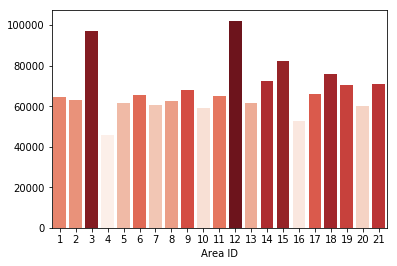

In [8]:
#view crime incidents per area
data = crime_by_area.size()
pal = sns.color_palette("Reds", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[:])[rank])
plt.show()

In [134]:
#used to plot legend
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

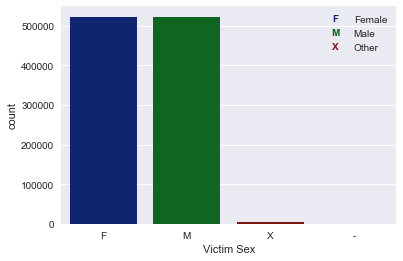

In [133]:
#plot crime based on gender
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
ax = sns.countplot(x="Victim Sex", data = trimmed_crime_data, palette = "dark")
t = ax.get_xticklabels()
handltext = ["M", "F", "X"]
labels = ["Male", "Female", "Other"]
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t if h.get_text()!="-"]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches) if h.get_text()!="-"]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()


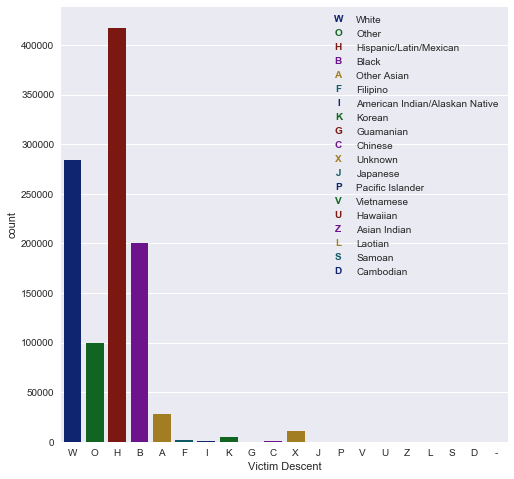

In [144]:
#plot crime based on victim descent
plt.figure(figsize=(8,8))
a = sns.countplot(x="Victim Descent", data = trimmed_crime_data, palette = "dark")
handltext2 = ["W", "O", "H", "B", "A", "F", "I", "K", "G", "C", "X", "J", "P", "V", "U", "Z", "L", "S", "D"]
labels2 = ["White", "Other", "Hispanic/Latin/Mexican", "Black", 
          "Other Asian", "Filipino", "American Indian/Alaskan Native", 
          "Korean", "Guamanian", "Chinese","Unknown", "Japanese", "Pacific Islander",
          "Vietnamese", "Hawaiian", "Asian Indian", "Laotian", "Samoan", "Cambodian"
         ]
t = a.get_xticklabels() 
labeldic = dict(zip(handltext2, labels2))
labels2 = [labeldic[h.get_text()]  for h in t if h.get_text()!="-"]
handles2 = [(h.get_text(),c.get_fc()) for h,c in zip(t,a.patches) if h.get_text()!="-"]

a.legend(handles2, labels2, handler_map={tuple : TextHandler()}) 

plt.show()

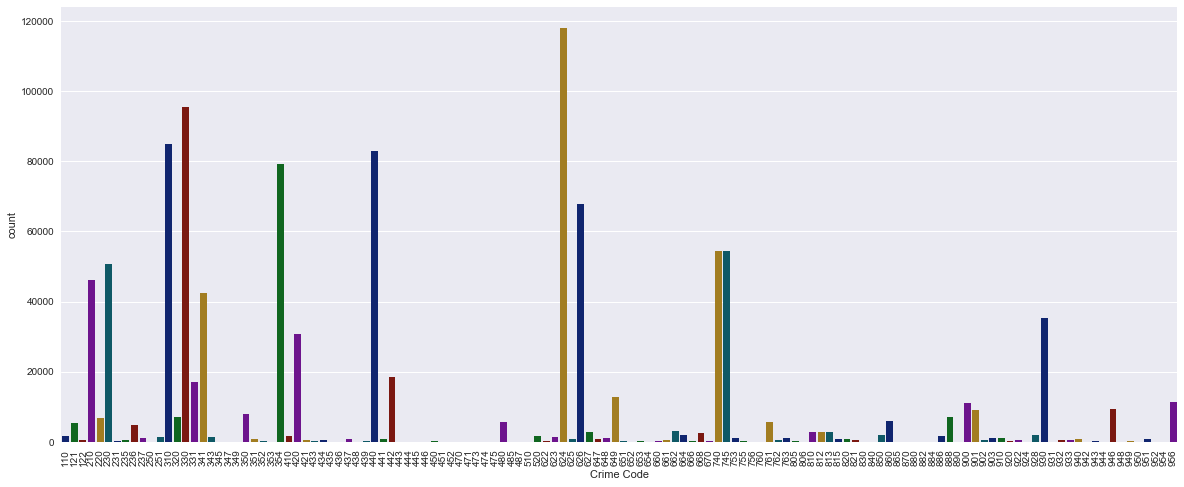

In [150]:
#plot crime based on Crime Code
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x="Crime Code", data = trimmed_crime_data, palette = "dark")
plt.show()

Since our focus lies in analyzing crime by the location, let us further investigate which particular localities experience the most crime incidents. 
Since each area ID corresponded to a certain locality in Los Angeles, the below function allows us to create a mapping between the two:

In [12]:
#creates mapping between two linked categories (columns)
def create_mapping(col1,col2,df):
    df = df.drop_duplicates()
    mapped_dict  = {code:item for code,item in zip(df[col1],df[col2])}
    reverse_mapped = {item:code for code,item in zip(df[col1],df[col2])}
    
    return mapped_dict,reverse_mapped

In [13]:
#mapping Area ID to the Area Name
crime_by_area_df = pd.DataFrame({'count' : crime_by_area.size()}).reset_index()
areaID_to_areaName,areaName_to_areaID = create_mapping('Area ID','Area Name',crime_data)
crime_by_area_df['Area Name'] = crime_by_area_df['Area ID'].apply(lambda x:areaID_to_areaName[x])
crime_by_area_df.head()

,Area ID,count,Area Name
0,1,64417,Central
1,2,63022,Rampart
2,3,97149,Southwest
3,4,45763,Hollenbeck
4,5,61691,Harbor


The below word graph gives a visual representation of the amount of crime: the localities with a greater proportion of crime are written in larger font.
<img src="WordCloud.png" alt="Drawing" style="width: 500px;"/>

Once we had an adequate understanding of the data, we narrowed the data to include just the incidents which included "Vehicle" within the crime code description and any vehicle-related premise in the Premise Description, since the focus of this project is on vehicle parking safety.

In [14]:
#extracting vehicle related data
trimmed_crime_data = pd.read_csv("./Data/Clean_data.csv") #loading the preprocessed data we generated earlier
vehicle = trimmed_crime_data[trimmed_crime_data['Crime Code Description'].str.contains("VEHICLE")]
premise_des = ["VEHICLE","VACANT LOT","PARKING","STREET","DRIVEWAY","GARAGE","VALET"] #vehicle-related key words
all_indices = []
for prem in premise_des:
    indices = trimmed_crime_data[trimmed_crime_data['Premise Description'].str.contains(prem)]
    indices = indices.index
    all_indices.extend(indices)
    
all_indices = set(all_indices)
all_indices = list(all_indices)

crime_des = ["VEHICLE","DRIVING"]
for c_des in crime_des:
    indices = trimmed_crime_data[trimmed_crime_data['Crime Code Description'].str.contains(c_des)]
    indices = indices.index
    all_indices.extend(indices)
    
all_indices = set(all_indices)
all_indices = list(all_indices)
parking_data = trimmed_crime_data.iloc[all_indices,:]
parking_data.reset_index(drop=True)
# parking_data.to_csv("Parking_data.csv")
# parking_data = crime_chunk_df.drop(['Crime Code 1', 'MO Codes'],axis=1)
parking_data.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,Crime Code 1,Address,Location
4,2/22/13,2/13/13,1200,12,1266,440,THEFT PLAIN - PETTY ($950 & UNDER),1300 0701 1402,42,M,H,108,PARKING LOT,IC,Invest Cont,440,82ND,"(33.9651, -118.2783)"
5,6/20/13,6/7/13,1200,12,1268,763,STALKING,0443 0913 1309,29,M,H,101,STREET,AO,Adult Other,763,100 W 82ND ST,"(33.9651, -118.2754)"
9,1/2/13,1/2/13,1430,1,134,626,INTIMATE PARTNER - SIMPLE ASSAULT,2004 1218 1813 1814 2002 0444 2000,39,F,H,101,STREET,IC,Invest Cont,626,4TH,"(34.0503, -118.2504)"
15,1/15/13,1/5/13,2010,1,133,624,BATTERY - SIMPLE ASSAULT,400,20,F,B,101,STREET,IC,Invest Cont,624,200 S SPRING ST,"(34.0517, -118.2456)"
19,1/12/13,1/12/13,1815,1,105,210,ROBBERY,1218 1310 0344 0400 0352,24,M,H,101,STREET,IC,Invest Cont,210,BISHOPS,"(34.0688, -118.2333)"


## Forming a Grid

Returning back to our objective, we want to allow drivers to choose areas based on safety. In other words, if a driver is situated in a particular location, he/she should be able to find which area may be safer to drive through or park in.

Since we have collected the latitude and longitude of each criminal incident, we are able to map the areas according to the amount of crime and annotate them to be safe or unsafe.

In order to accomplish this task, we felt it to be most effective to break the area of Los Angeles into a grid with individual square length to be 0.5 mile. This granularity will allow us to differentiate in the crime rates of regions approximately 0.5 mile in distance. 

The grid is formed in the AreaChunker module (Appendix chunker.py) by a function with input of the maximum and minimum of latitudes and longitudes of Los Angeles and output of several squares (outlined by their respective latitudes and longitudes) embedded within that area. The output is shown in the DataFrame below. The x and y columns represent the square location within the grid (x = row number and y = column number) and the rest of the four columns denote the latitudes (degrees North) and longitudes (degrees West) that outline the square.

In [15]:
chunk_outline_data = "./AreaChunker/chunk_outline_data.csv"
chunk_outline_data = pd.read_csv(chunk_outline_data)
chunk_outline_data.head()

,x,y,Left Longitude,Right Longitude,Top Latitude,Bottom Latitude
0,0,0,118.77,118.764542,34.620000,34.615508
1,0,1,118.77,118.764542,34.615508,34.611017
2,0,2,118.77,118.764542,34.611017,34.606525
3,0,3,118.77,118.764542,34.606525,34.602034
4,0,4,118.77,118.764542,34.602034,34.597542


Next, each of the crime incidents was assigned a square (x,y) based on the latitude and longitude of the crime (Appendix chunker.py *assign_point_to_chunks*). The square (x,y), i.e. chunk, for each crime can be seen in the DataFrame below in the last two columns:

In [16]:
crime_chunk_file = "./Data/chunked_data.csv"
crime_chunk_df = pd.read_csv(crime_chunk_file)
crime_chunk_df = crime_chunk_df.drop(["Unnamed: 0", "Unnamed: 0.1", 'Crime Code 1', 'MO Codes'],axis=1)
crime_chunk_df.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,Address,Location,latitude,longitude,chunk_x,chunk_y
0,2013-02-22,2013-02-13,1200,12,1266,440,THEFT PLAIN - PETTY ($950 & UNDER),42,M,H,108,PARKING LOT,IC,Invest Cont,82ND,"(33.9651, -118.2783)",33.9651,118.2783,145,90
1,2013-06-20,2013-06-07,1200,12,1268,763,STALKING,29,M,H,101,STREET,AO,Adult Other,100 W 82ND ST,"(33.9651, -118.2754)",33.9651,118.2754,145,90
2,2013-01-02,2013-01-02,1430,1,134,626,INTIMATE PARTNER - SIMPLE ASSAULT,39,F,H,101,STREET,IC,Invest Cont,4TH,"(34.0503, -118.2504)",34.0503,118.2504,126,95
3,2013-01-15,2013-01-05,2010,1,133,624,BATTERY - SIMPLE ASSAULT,20,F,B,101,STREET,IC,Invest Cont,200 S SPRING ST,"(34.0517, -118.2456)",34.0517,118.2456,126,96
4,2013-01-12,2013-01-12,1815,1,105,210,ROBBERY,24,M,H,101,STREET,IC,Invest Cont,BISHOPS,"(34.0688, -118.2333)",34.0688,118.2333,122,98


## Calculating Crime Scores

To determine the safety of every chunk generated above, the frequency of crimes and the intensity of each crime in that square must be taken into account. Before that however, the times of day were categorized into 6 time slots:
- T1: Late Night (0:00 to 3:59)
- T2: Early Morning (4:00 to 7:59)
- T3: Morning (8:00 to 11:59)
- T4: Afternoon (12:00 to 15:59)
- T5: Evening (16:00 to 19:59)
- T6: Night (20:00 to 23:59)

In [17]:
def divide_time(x):
    if x>=0 and x<400:
        return "T1"
    elif x>=400 and x<800:
        return "T2"
    if x>=800 and x<1200:
        return "T3"
    elif x>=1200 and x<1600:
        return "T4"
    elif x>=1600 and x<2000:
        return "T5"
    elif x>=2000 and x<2400:
        return "T6"

In [18]:
crime_chunk_df["Time of Day"] = crime_chunk_df["Time Occurred"].apply(divide_time)
crime_chunk_df.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,...,Premise Description,Status Code,Status Description,Address,Location,latitude,longitude,chunk_x,chunk_y,Time of Day
0,2013-02-22,2013-02-13,1200,12,1266,440,THEFT PLAIN - PETTY ($950 & UNDER),42,M,H,...,PARKING LOT,IC,Invest Cont,82ND,"(33.9651, -118.2783)",33.9651,118.2783,145,90,T4
1,2013-06-20,2013-06-07,1200,12,1268,763,STALKING,29,M,H,...,STREET,AO,Adult Other,100 W 82ND ST,"(33.9651, -118.2754)",33.9651,118.2754,145,90,T4
2,2013-01-02,2013-01-02,1430,1,134,626,INTIMATE PARTNER - SIMPLE ASSAULT,39,F,H,...,STREET,IC,Invest Cont,4TH,"(34.0503, -118.2504)",34.0503,118.2504,126,95,T4
3,2013-01-15,2013-01-05,2010,1,133,624,BATTERY - SIMPLE ASSAULT,20,F,B,...,STREET,IC,Invest Cont,200 S SPRING ST,"(34.0517, -118.2456)",34.0517,118.2456,126,96,T6
4,2013-01-12,2013-01-12,1815,1,105,210,ROBBERY,24,M,H,...,STREET,IC,Invest Cont,BISHOPS,"(34.0688, -118.2333)",34.0688,118.2333,122,98,T5


To generate a crime score for each chunk, the Crime Code data was used as a measure of the extremity of the crime. For every crime, a crime score value was generated to be inverse of the crime code value, yeilding a higher score for more extreme crimes. 

In [19]:
crime_score_df = crime_chunk_df[["chunk_x", "chunk_y","Time of Day","Crime Code"]]
crime_score_df["Crime Score"] = crime_score_df["Crime Code"].apply(lambda x: 1000/x)
crime_score_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chunk_x,chunk_y,Time of Day,Crime Code,Crime Score
0,145,90,T4,440,2.272727
1,145,90,T4,763,1.310616
2,126,95,T4,626,1.597444
3,126,96,T6,624,1.602564
4,122,98,T5,210,4.761905


The sum of the crime scores for all the crimes in one chunk (crimes with same chunk_x and chunk_y) at a particular Time of Day was assigned to that chunk and time slot.

In [20]:
crime_by_chunk_and_hour = crime_score_df.groupby(by=["chunk_x", "chunk_y", "Time of Day"]).agg({"Crime Score":sum})
crime_by_chunk_and_hour = crime_by_chunk_and_hour.reset_index()
crime_by_chunk_and_hour = crime_by_chunk_and_hour.sort_values(by = ["chunk_x", "chunk_y", "Time of Day", "Crime Score"])
crime_by_chunk_and_hour.head()

,chunk_x,chunk_y,Time of Day,Crime Score
0,0,107,T4,3.030303
1,1,104,T6,3.225806
2,5,108,T3,1.602564
3,5,108,T6,4.632867
4,7,112,T4,1.342282


The chunks and/or time slots that did not have any crime occur was assigned crime score value 0.0. 

In [21]:
#Generating all combinations of chunk_x and chunk_y and times of day
#LA grid has 286 rows 198 cols
times_of_day = crime_by_chunk_and_hour["Time of Day"].unique()
all_combos = [[x,y,z] for x in range(286) for y in range(198) for z in times_of_day]
all_combos_df = pd.DataFrame(all_combos, columns = ["chunk_x", "chunk_y", "Time of Day"])
all_combos_df.head()

,chunk_x,chunk_y,Time of Day
0,0,0,T4
1,0,0,T6
2,0,0,T3
3,0,0,T5
4,0,0,T1


In [22]:
merged_crime = crime_by_chunk_and_hour.merge(all_combos_df, how = "right")
merged_crime = merged_crime.sort_values(by = ["chunk_x", "chunk_y"])
merged_crime = merged_crime.reset_index(drop=True)
merged_crime = merged_crime.fillna(0.0)
merged_crime = merged_crime.set_index(["chunk_x", "chunk_y", "Time of Day"])
merged_crime_copy = merged_crime.copy(deep=True)
merged_crime_copy = merged_crime_copy.reset_index()
merged_crime_copy.head()

,chunk_x,chunk_y,Time of Day,Crime Score
0,0,0,T4,0.0
1,0,0,T6,0.0
2,0,0,T3,0.0
3,0,0,T5,0.0
4,0,0,T1,0.0


Next, we considered that if a crime occurred at time t, the chance of crime occurring at times t-1 and t+1 will tend to be higher. A higher weight was assigned to directly neighboring time slots as compared to the rest of time slots.

In addition, we accounted for the fact that if a crime occurred in square (x1, y1), its neighboring squares may be more likely to have seen the crime as compared to the rest of the sqaures in the grid. In order to account for the neighboring time and square influences, a discounted crime score was added to the existing crime score of each square at that particular time. 

In [23]:
def discount_crime_score(merged_crime_row, times_of_day, merged_crime):
    
    weights = {"T1": {"T2": 0.6, "T6": 0.6, "T3":0.2, "T3":0.2, "T4":0.2, "T1":0},\
              "T2": {"T2": 0, "T4": 0.2, "T5":0.2, "T6":0.2, "T3":0.6, "T1":0.6},\
               "T3": {"T6": 0.2, "T3": 0, "T5":0.2, "T4":0.6, "T1":0.2, "T2":0.6},\
               "T4": {"T1": 0.2, "T5": 0.6, "T3":0.6, "T4":0, "T2":0.2, "T6":0.2},\
               "T5": {"T2": 0.2, "T3": 0.2, "T5":0, "T6":0.6, "T4":0.6, "T1":0.2},\
               "T6": {"T5": 0.6, "T1": 0.2, "T4":0.6, "T6":0, "T2":0.2, "T3":0.2}}
    
    curr_time = merged_crime_row[-2] 
    curr_x = merged_crime_row[0]
    curr_y = merged_crime_row[1]
    disc_score = merged_crime_row[-1] 
    
    #times of day effect on score
    for k,v in weights[curr_time].items():
        disc_score += merged_crime.loc[curr_x, curr_y, k]*v
    
    disc_factor = 0.6
    
    #neighbors' effect on score
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x+1,curr_y,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x,curr_y+1,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x+1,curr_y+1,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x-1,curr_y,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x,curr_y-1,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x-1,curr_y-1,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x+1,curr_y-1,curr_time]
    except:
        pass
    try:
        disc_score += disc_factor*merged_crime.loc[curr_x-1,curr_y+1,curr_time]
    except:
        pass

    return disc_score

In [24]:
merged_crime_copy['Discounted Score'] = merged_crime_copy.apply(discount_crime_score, axis = 1, args = (times_of_day, merged_crime))
merged_crime_copy.head()

,chunk_x,chunk_y,Time of Day,Crime Score,Discounted Score
0,0,0,T4,0.0,0.0
1,0,0,T6,0.0,0.0
2,0,0,T3,0.0,0.0
3,0,0,T5,0.0,0.0
4,0,0,T1,0.0,0.0


## Crime Score Visualization

Now that the crime scores for each square for each time slot have been generated, it's time to visualize them on the Los Angeles map! 

For our visualization, we used the bokeh library. The plots allow us to see the safety of each square that we had generated earlier. The darker reds represent the most severe crime areas, which would be deemed unsafe to drive through or park.

After loading the data for the latitudes and longitides for each of the squares, the data is segregated according to the time slots.

In [212]:
import pandas as pd
import math
from bokeh.io import output_notebook, show
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread 

from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.models.formatters import DatetimeTickFormatter

from bokeh.models import WMTSTileSource
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Reds9 as palette
from bokeh.plotting import figure,output_notebook, show
from bokeh.resources import INLINE
palette.reverse()
output_notebook()

Loading BokehJS ...

In [213]:
chunk_data = pd.read_csv("./Data/chunk_data.tsv",sep = "\t")
scored_data = pd.read_csv("./Data/Scored_Chunks_Final.csv")
T1_data = scored_data[scored_data["Time of Day"]=="T1"]
T2_data = scored_data[scored_data["Time of Day"]=="T2"]
T3_data = scored_data[scored_data["Time of Day"]=="T3"]
T4_data = scored_data[scored_data["Time of Day"]=="T4"]
T5_data = scored_data[scored_data["Time of Day"]=="T5"]
T6_data = scored_data[scored_data["Time of Day"]=="T6"]

In [214]:
T1_data = T1_data.drop("Unnamed: 0",axis=1)
T1_data = T1_data.reset_index(drop=True)

T2_data = T2_data.drop("Unnamed: 0",axis=1)
T2_data = T2_data.reset_index(drop=True)

T3_data = T3_data.drop("Unnamed: 0",axis=1)
T3_data = T3_data.reset_index(drop=True)

T4_data = T4_data.drop("Unnamed: 0",axis=1)
T4_data = T4_data.reset_index(drop=True)

T5_data = T5_data.drop("Unnamed: 0",axis=1)
T5_data = T5_data.reset_index(drop=True)

T6_data = T6_data.drop("Unnamed: 0",axis=1)
T6_data = T6_data.reset_index(drop=True)

The below function is returning a dictionary which represents the mapping between the sqaure (x and y) and discounted score.

In [215]:
def get_discounted_score(chunked_data):
    xs = list(chunked_data["chunk_x"])
    ys = list(chunked_data["chunk_y"])
    Discounted_Score = list(chunked_data["Discounted Score"])
    ds={}
    for i in range(len(xs)):
        ds[(xs[i],ys[i])] = Discounted_Score[i]
    return ds

In [216]:
ds_1 = get_discounted_score(T1_data)
ds_2 = get_discounted_score(T2_data)
ds_3 = get_discounted_score(T3_data)
ds_4 = get_discounted_score(T4_data)
ds_5 = get_discounted_score(T5_data)
ds_6 = get_discounted_score(T6_data)

Now, we will assign discounted scores to the chunk data based on the time slots.

In [217]:
chunk_T1_data = pd.DataFrame.copy(chunk_data)
chunk_T2_data = pd.DataFrame.copy(chunk_data)
chunk_T3_data = pd.DataFrame.copy(chunk_data)
chunk_T4_data = pd.DataFrame.copy(chunk_data)
chunk_T5_data = pd.DataFrame.copy(chunk_data)
chunk_T6_data = pd.DataFrame.copy(chunk_data)

In [218]:
def get_revised_chunk_data(chunked_data,ds):
    chunked_xs = list(chunked_data['x'])
    chunked_ys = list(chunked_data['y'])
    chunked_lat = list(chunked_data['lat'])
    chunked_long = list(chunked_data['long'])
    latts = []
    longs = []
    Discounted_score = []
    for i in range(len(chunked_xs)):
        latt = float(chunked_lat[i].split(",")[0])
        long = float(chunked_long[i].split(",")[0])
        latts.append(latt)
        longs.append(long)
        Discounted_score.append(ds[(chunked_ys[i],chunked_xs[i])])
    chunked_data['lat']=latts
    chunked_data['long'] = longs
    chunked_data['Discounted_score'] = Discounted_score
    return chunked_data

In [219]:
chunk_T1_data = get_revised_chunk_data(chunk_T1_data,ds_1)
chunk_T2_data = get_revised_chunk_data(chunk_T2_data,ds_2)

chunk_T3_data = get_revised_chunk_data(chunk_T3_data,ds_3)
chunk_T4_data = get_revised_chunk_data(chunk_T4_data,ds_4)

chunk_T5_data = get_revised_chunk_data(chunk_T5_data,ds_5)
chunk_T6_data = get_revised_chunk_data(chunk_T6_data,ds_6)

Generally, mercator coordinates are used to plot GeoSpatial Data as it is a cylindrical map projection of the latitude and longitude. Accordingly, the bokeh library expects mercator coordinates as input for the figure.
Below, we will convert our latitudes and longitudes into mercator coordinates.

In [220]:
def merc_x(lon):
    x = lon * 20037508.34 / 180
    return x

def merc_y(lat):
    y = math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180);
    y = y * 20037508.34 / 180;
    return y

In [221]:
#latitudes and longitudes that outline the Los Angeles Metro Area
lat1 = 33.34
lon1 = -117.70
lat2 = 34.62 
lon2 = -118.77

mercx1 = merc_x(lon1)
mercy1 = merc_y(lat1)
mercx2 =  merc_x(lon2)
mercy2 =  merc_y(lat2)

In [222]:
#generate mercator coordinates for every square (x,y) for each time slot data
chunk_T1_data['merc_x']=chunk_T1_data['long'].apply(merc_x)
chunk_T1_data['merc_y']=chunk_T1_data['lat'].apply(merc_y)

chunk_T2_data['merc_x']=chunk_T2_data['long'].apply(merc_x)
chunk_T2_data['merc_y']=chunk_T2_data['lat'].apply(merc_y)

chunk_T3_data['merc_x']=chunk_T3_data['long'].apply(merc_x)
chunk_T3_data['merc_y']=chunk_T3_data['lat'].apply(merc_y)

chunk_T4_data['merc_x']=chunk_T4_data['long'].apply(merc_x)
chunk_T4_data['merc_y']=chunk_T4_data['lat'].apply(merc_y)

chunk_T5_data['merc_x']=chunk_T5_data['long'].apply(merc_x)
chunk_T5_data['merc_y']=chunk_T5_data['lat'].apply(merc_y)

chunk_T6_data['merc_x']=chunk_T6_data['long'].apply(merc_x)
chunk_T6_data['merc_y']=chunk_T6_data['lat'].apply(merc_y)

Since we have assigned crime score 0.0 to the squares which do not see crime incidents, we will plot the discounted scores which are strictly  greater than 0.0.

##### Plotting Late Night (T1) Crime

In [258]:
chunk_T1_data = chunk_T1_data[chunk_T1_data['Discounted_score'] > 0.0]
source1 = ColumnDataSource(
        data=dict(
            x= chunk_T1_data['merc_x'],
            y= chunk_T1_data['merc_y'],
            crime_score = chunk_T1_data['Discounted_score'],
            latitude = chunk_T1_data['lat'],
            longitude = chunk_T1_data['long']
        )
    )
hover = HoverTool(tooltips = [('latitude','@latitude'),('longitude','@longitude'),('crime score:','@crime_score')])
p1 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p1.add_tile(CARTODBPOSITRON)

TileRenderer(id='00b2e9e3-fa72-4b9b-a0eb-c34d5b66bd16', ...)

In [259]:
color_mapper = LogColorMapper(palette=palette)
c1 = p1.square('x', 'y',source=source1,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p1)

##### Plotting Early Morning (T2) Crime

In [260]:
chunk_T2_data = chunk_T2_data[chunk_T2_data['Discounted_score'] > 0.0]
source2 = ColumnDataSource(
        data=dict(
            x= chunk_T2_data['merc_x'],
            y= chunk_T2_data['merc_y'],
            crime_score = chunk_T2_data['Discounted_score'],
            latitude = chunk_T2_data['lat'],
            longitude = chunk_T2_data['long']
        )
    )
p2 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p2.add_tile(CARTODBPOSITRON)

TileRenderer(id='2221e478-799f-4b73-98e4-4928e5bc0250', ...)

In [261]:
c2 = p2.square('x', 'y',source=source2,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p2)

##### Plotting Morning (T3) Crime 

In [262]:
chunk_T3_data = chunk_T3_data[chunk_T3_data['Discounted_score'] > 0.0]
source3 = ColumnDataSource(
        data=dict(
            x= chunk_T3_data['merc_x'],
            y= chunk_T3_data['merc_y'],
            crime_score = chunk_T3_data['Discounted_score'],
            latitude = chunk_T3_data['lat'],
            longitude = chunk_T3_data['long']
        )
    )
p3 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p3.add_tile(CARTODBPOSITRON)

TileRenderer(id='b6107afb-ae06-471f-a8ed-9bb5e82eaf7a', ...)

In [263]:
c3 = p3.square('x', 'y',source=source3,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p3)

##### Plotting Afternoon (T4) Crime

In [264]:
chunk_T4_data = chunk_T4_data[chunk_T4_data['Discounted_score'] > 0.0]
source4 = ColumnDataSource(
        data=dict(
            x= chunk_T4_data['merc_x'],
            y= chunk_T4_data['merc_y'],
            crime_score = chunk_T4_data['Discounted_score'],
            latitude = chunk_T4_data['lat'],
            longitude = chunk_T4_data['long']
        )
    )
p4 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p4.add_tile(CARTODBPOSITRON)

TileRenderer(id='ae5622bd-b176-4ab7-96de-fcda6b81b156', ...)

In [265]:
c4 = p4.square('x', 'y',source=source4,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p4)

##### Plotting Evening (T5) Crime

In [266]:
chunk_T5_data = chunk_T5_data[chunk_T5_data['Discounted_score'] > 0.0]
source5 = ColumnDataSource(
        data=dict(
            x= chunk_T5_data['merc_x'],
            y= chunk_T5_data['merc_y'],
            crime_score = chunk_T5_data['Discounted_score'],
            latitude = chunk_T5_data['lat'],
            longitude = chunk_T5_data['long']
        )
    )
p5 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p5.add_tile(CARTODBPOSITRON)

TileRenderer(id='e1d1fd98-629a-476d-bab2-a9be7fa4e96f', ...)

In [283]:
c5 = p5.square('x', 'y',source=source5,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p5)

##### Plotting Night (T6) Crime

In [268]:
chunk_T6_data = chunk_T6_data[chunk_T6_data['Discounted_score'] > 0.0]
source6 = ColumnDataSource(
        data=dict(
            x= chunk_T6_data['merc_x'],
            y= chunk_T6_data['merc_y'],
            crime_score = chunk_T6_data['Discounted_score'],
            latitude = chunk_T6_data['lat'],
            longitude = chunk_T6_data['long']
        )
    )
p6 = figure(x_range=(mercx1, mercx2), y_range=(mercy1, mercy2),
           x_axis_type="mercator", y_axis_type="mercator",tools=['pan,wheel_zoom,box_zoom,reset,previewsave',hover])
p6.add_tile(CARTODBPOSITRON)

TileRenderer(id='79ec414e-a3ea-4485-a30d-78c5e2d4b063', ...)

In [271]:
c6 = p6.square('x', 'y',source=source5,
               fill_color={'field': 'crime_score', 'transform': color_mapper},
              size=5,
                 hover_fill_color="firebrick",
                fill_alpha=0.5, hover_alpha=0.6,
                line_color=None, hover_line_color="white")
show(p6)

## Side Analysis

After we combed through the data, there were a few observations which piqued our interest. Here we present two of the interesting analyses which we performed in addition to our main analysis from above.

### Effect of Weather on Crime Rates 

One key observation we saw during our exploratory data analysis was a clear consistent dip in the crime rate during the month of February every year. A possible hypothesis we formulated was that _lower temperatures were correlated with lower crime rates_. Below, we test our hypothesis.

First, we extract the year and month from the Date Occurred column in order to create groupby objects. 

In [235]:
df = crime_data.copy(deep = True)
df['month'] = df['Date Occurred'].apply(lambda x:x.month)
df['year'] = df['Date Occurred'].apply(lambda x:x.year)
crimes_by_month = df.groupby(by=['year','month']).agg('count').reset_index()
tdf = crimes_by_month[['year','month','DR Number']] 
tdf = crimes_by_month.rename(columns={'DR Number': 'Crimes'})
tdf.head()

,year,month,Crimes,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,2010,1,19308,19308,19308,19308,19308,19308,19308,19308,...,6232,19308,19308,19308,1278,22,1,19308,3016,19308
1,2010,2,15991,15991,15991,15991,15991,15991,15991,15991,...,5319,15991,15991,15991,1035,17,3,15991,2575,15991
2,2010,3,18102,18102,18102,18102,18102,18102,18102,18102,...,5983,18101,18102,18101,1242,28,0,18102,3132,18102
3,2010,4,17734,17734,17734,17734,17734,17734,17734,17734,...,5906,17734,17734,17734,1141,19,1,17734,3006,17734
4,2010,5,17694,17694,17694,17694,17694,17694,17694,17694,...,6217,17694,17694,17694,1186,14,0,17694,3072,17694


Now, we create a string representation of month and year so as to provide xtick labels on the graph.

In [236]:
tdf['month-year'] = tdf.apply(lambda x: str(x[0])+"-"+str(x[1]),axis=1)
tdf = tdf[tdf['year'] <2018]
tdf['month-year'] = pd.to_datetime(tdf['month-year'],format="%Y-%m")
tdf['ticks'] = tdf['month-year'].apply(lambda x: x.strftime("%B-%Y"))

Finally, it's time to plot the interactive graph in bokeh!

In [275]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x= tdf['month-year'],
            y= tdf['Crimes'],
            name = list(tdf['ticks'])
        )
    )

p = figure(plot_width=700, plot_height=700, tools=['pan,wheel_zoom,box_zoom,reset,previewsave'], title="Number of crimes from 2010 to 2017 per month")
p.xaxis.formatter = DatetimeTickFormatter(
 months=["%B %Y"],
 years=["%B %Y"],
)
p.line('x', 'y', source=source, line_width=3, line_alpha=0.6, color="firebrick")

cr = p.circle('x', 'y',source=source, size=20,
                fill_color="grey", hover_fill_color="firebrick",
                fill_alpha=0.05, hover_alpha=0.8,
                line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=[
            ('when','@name'),
            ("Number of crimes:" , "@y"),
        ], renderers=[cr], mode='hline'))
show(p)


Hover over the graph to observe the exact time ranges for when the dips are occuring and to see similar crime rates across years.

Let's see if there is any correlation between temperature and crime.

In [238]:
average_temperatures = [
                        60.8, 58.95,61.25,58.65,61.3,64.75,66.95,67.95,68.4,65.65,62.8,59.25,
                        61.55, 55.85, 59.3, 63.3, 62.7, 64.15, 68.85, 69.2, 68.5, 67.45, 61.85, 57.95,
                        64.25, 59.6, 57.75, 60.5, 62.3, 64, 66.4, 73.05, 73.75, 69.8, 63, 56.65,
                        50.2, 57.85, 59.9, 61.8, 65.95, 66.8, 68.85, 69.1, 71.2, 65.85, 65.45, 61.75,
                        64.75, 60.6, 62.7, 63.5, 68.8, 66.8, 71.9, 71.95, 74.45, 71.1, 67.4, 60.2, 
                        63.5, 63.65, 67.35, 63.9, 61.7, 67.9, 70.8, 73.6, 75.85, 74.5, 64.4, 59.05,
                        58.55, 67.45, 61.9, 64.7, 62.1, 69.2, 71.7, 70.3, 71.2, 69.3, 67.55, 59.55,
                        57.25, 58.5, 63.8, 64.85, 63.25, 67.5, 71.95, 72.2, 72.15, 72.7, 67 ,37.85
                       ]
tdf['averageTemp'] =average_temperatures 
tdf.head()

,year,month,Crimes,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,month-year,ticks,averageTemp
0,2010,1,19308,19308,19308,19308,19308,19308,19308,19308,...,19308,1278,22,1,19308,3016,19308,2010-01-01,January-2010,60.80
1,2010,2,15991,15991,15991,15991,15991,15991,15991,15991,...,15991,1035,17,3,15991,2575,15991,2010-02-01,February-2010,58.95
2,2010,3,18102,18102,18102,18102,18102,18102,18102,18102,...,18101,1242,28,0,18102,3132,18102,2010-03-01,March-2010,61.25
3,2010,4,17734,17734,17734,17734,17734,17734,17734,17734,...,17734,1141,19,1,17734,3006,17734,2010-04-01,April-2010,58.65
4,2010,5,17694,17694,17694,17694,17694,17694,17694,17694,...,17694,1186,14,0,17694,3072,17694,2010-05-01,May-2010,61.30


We calculate the Pearson Correlation Coefficient between crime and average temperature.

In [239]:
corr = tdf[['Crimes','averageTemp']]
np.corrcoef(corr["Crimes"],corr['averageTemp'])[0,1]

0.26142559000492355

As seen above, there is a slight positive correlation between the two. 

The Pearson correlation co-efficient is a measure of the strength of the relationship between two variables but we need to make sure this relationship is statistically significant and not a result of a sampling error.
Below, we test the significance of the correlation. 

**Null Hypothesis - There is no relationship between average temperature during the month and the number of crimes occuring in the month, i.e r = 0.0 (here, r is the Pearson correlation coefficient).**

In [240]:
#Sample size N
N = 96
#Pearson Correlation co-efficient
r = 0.2614

#Significance level 
alpha = 0.05

t = r*((N-2)/(1-r**2))**0.5
print("T-value: ", t)

T-value:  2.625659740030705


<img src="./Side analysis/tvalue.png" alt="Drawing" style="width: 300px;"/>
Looking up the table of critical values for degrees of freedom=N-2 = 94 and one-tailed test we find the  critical value of t=1.661. As the value 2.625 > critical value, we can reject the null hypothesis and thus conclude that the correlation between Temperature and rate of crime is statistically significant.

### Relationship between Date Occurred and Date Reported Across Types of Crime

The next analysis we performed evaluates the relationship between type of crime and the amount of time taken to report the crime.

First, we calculate the time taken to report each crime.

In [249]:
sns.set()

In [250]:
df2 = crime_data.copy(deep = True)
df2['time_to_report'] = df2['Date Reported'] - df2['Date Occurred']
df2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,time_to_report
0,1208575,2013-03-14,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",3 days
1,102005556,2010-01-25,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",3 days
2,418,2013-03-19,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",1 days
3,101822289,2010-11-11,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",1 days
4,42104479,2014-01-11,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",7 days


Then, we group our data by the type of crime and calculate the mean reporting time. We separate crimes which have high report times (fourth quartile) from the ones which have low report times (first quartile).

In [251]:
partial = df2[['time_to_report','Crime Code Description']]
partial["time"] = partial['time_to_report'].apply(lambda x:x.days)
partial = partial.groupby("Crime Code Description").agg({"time":np.mean})
high_report_times = partial[partial['time'] > 39]
low_report_times = partial[partial['time'] <= 7]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Time to visualize the crimes with high report times!

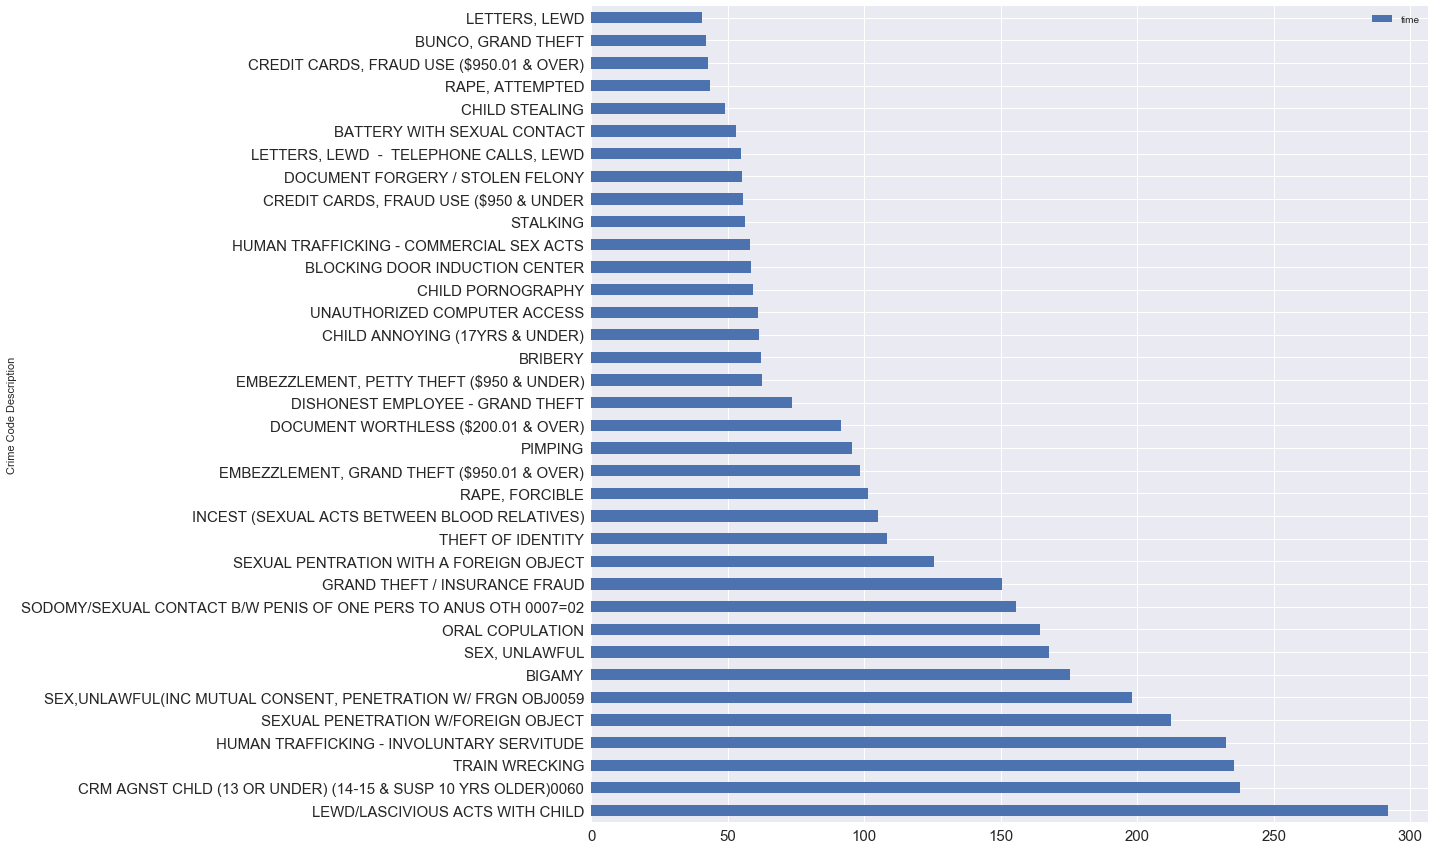

In [252]:
high_report_times = high_report_times.sort_values('time',ascending=False)
high_report_times.plot(y='time',kind='barh',figsize=(15,15),fontsize=15)

Above we see that the crimes involving children and those of sexual nature have the highest reporting times (up to nearly 300 days after the day of occurrence). 

A key reason we believe that the crimes involving children have  higher reporting times is that children may not recognize that they are victims of a criminal act. In order to combat this menace, we must make children aware of potential crimes and educate them to report the crimes in time. 

As for the delayed reporting times for the sexually-related crimes, a possible reason may be the negative stigma associated with the victims of such sexual acts.

## Future Work

In the future, we would like to utilize the entire dataset to create a machine learning model which can predict how susceptible a person is to be a victim of a crime. In addition, we would like to create an application which would help a user identify the safest parking spot based on location and time of day.

## Conclusion

Above, our analysis has shown the importance of evaluating raw crime data to derive insights which can be utilized in multiple applications to enhance societal awareness and safety. Not only can it help locate safe areas when moving about in LA, but it can even prove useful to the LAPD to appropriately allocate their workforce.

## References and Further Resources

1. [Los Angeles Crime Data](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq)
2. [Mapping GeoData with Bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide/geo.html)

## Appendix 

**scraper.py**

In [282]:
import io, time, json
import requests
import pandas as pd
from bs4 import BeautifulSoup

def scraper():
    def retrieve_html(url):
        response=requests.get(url)
        return (response.status_code, response.text)

    api_key = '****'

    def crime_data_search(api_key,offset, query=None):
        headers = {
            "X-App-Token": api_key,
        }
        params = {
            "offset":offset
        }
        response = requests.get('https://data.lacity.org/resource/7fvc-faax.json',headers=headers)
        result=response.json()
        return result

    data_n = []
    offset = 848000
    while(offset<2000000):
        try:
            data_n.extend(crime_data_search(api_key,offset))
            offset+=1000
        except:
            break

    cols_req = ['area_id','area_name','date_occ','date_rptd'
                ,'time_occ','crm_cd','crm_cd_desc','vict_age'
                ,'vict_descent','vict_sex','premis_desc','location']
    crime_df = pd.DataFrame(columns=cols_req)        

    li1 = []
    for i in range(len(data_n)):
        try:
            li1.append([data_n[i][x] for x in cols_req])
        except:
            continue
    crime_df1 = pd.DataFrame(li1, columns=cols_req)
    crime_df1.to_csv("scraped_crime_data.csv")  

#### grid.py

In [253]:
class Grid:
    def __str__(self):
        str1 = "({0} , {1} , {2} , {3})".format(self.left_lon,self.top_lat,self.right_lon,self.bottom_lat)
        # print(str1)
        return str1

    def __init__(self,left_lon,top_lat,right_lon,bottom_lat,x = None,y = None,name=None):
        self.left_lon = left_lon
        self.top_lat = top_lat
        self.right_lon = right_lon
        self.bottom_lat = bottom_lat
        self.top_left = self.top_lat, self.left_lon
        self.top_right = self.top_lat , self.right_lon
        self.bottom_left = self.bottom_lat , self.left_lon
        self.bottom_right = self.bottom_lat , self.right_lon
        self.x = x
        self.y = y
        self.name = None

    def set_xy(self,x,y):
        self.x = x
        self.y = y

    def get_xy(self):
        return (self.x,self.y)

    def get_coordinates(self):
        return (self.left_lon,self.top_lat,self.right_lon,self.bottom_lat)

    def set_coordinates(self,left_lon=None,top_lat=None,right_lon=None,bottom_lat=None):
        if left_lon:
            self.left_lon = left_lon
        if top_lat:
            self.top_lat = top_lat
        if right_lon:
            self.right_lon = right_lon
        if bottom_lat:
            self.bottom_lat = bottom_lat

    def get_name(self):
        return self.name

    def set_name(self,name):
        self.name = name


#### chunker.py

In [254]:
# from grid import Grid
from math import sin, cos, sqrt, atan2, radians , asin , pi
import math
import csv

class AreaChunker:

    def __init__(self,left_lon,top_lat,right_lon,bottom_lat):
        self.root = Grid(left_lon,top_lat,right_lon,bottom_lat)
        self.chunks = {}
        self.id = 0
        # print(self.root)


    def distance_between_points(self,A,B):
        # approximate radius of earth in km
        R = 6373.0

        lat1, lon1 = A
        lat2, lon2 = B

        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        distance_in_miles = distance * 0.621371

        return distance_in_miles

    def new_coordinates_from_distance(self,coordinates,distance,brng,keep=2):
        lat1,lon1 = coordinates
        R = 6378.1  # Radius of the Earth
        brng = math.radians(brng)  # Bearing is 90 degrees converted to radians.


        lat1 = math.radians(lat1)  # Current lat point converted to radians
        lon1 = math.radians(lon1)  # Current long point converted to radians

        lat2 = math.asin(math.sin(lat1) * math.cos(distance / R) +
                         math.cos(lat1) * math.sin(distance / R) * math.cos(brng))

        lon2 = lon1 + math.atan2(math.sin(brng) * math.sin(distance / R) * math.cos(lat1),
                                 math.cos(distance / R) - math.sin(lat1) * math.sin(lat2))

        lat2 = math.degrees(lat2)
        lon2 = math.degrees(lon2)

        if keep == 0:
            return lon2
        elif keep == 1:
            return lat2
        else:
            return (lat2,lon2)

    def chunk(self,d=0.5):
        start = self.root.top_left

        longitudes = [start[1]]
        while start[1] >= self.root.top_right[1]:
            west = self.new_coordinates_from_distance(start,d,270,keep=0)
            start  = (start[0],west)
            longitudes.append(west)
        start = self.root.top_left
        latitudes = [start[0]]


        while start[0] >= self.root.bottom_left[0]:
            south = self.new_coordinates_from_distance(start,d,180,keep=1)
            start  = (south,start[1])
            latitudes.append(south)

        print("Number of latitudes generated" ,len(latitudes))
        print("Number of longitudes generated" , len(longitudes))

        self.num_rows = len(latitudes)-1
        self.num_cols = len(longitudes)-1

        print(self.num_rows)
        print(self.num_cols)
        f = open("chunk_outline_data.csv","w")
        writer = csv.writer(f,delimiter=",")
        writer.writerow(["x","y","Left Longitude", "Right Longitude", "Top Latitude", "Bottom Latitude"])

        for long_idx in range(0,len(longitudes)-1):
            for lat_idx in range(0,len(latitudes)-1):
                x = lat_idx
                y = long_idx
                # print("here::",longitudes[long_idx],latitudes[lat_idx],longitudes[long_idx+1],latitudes[lat_idx+1])
                mini_chunk = Grid(longitudes[long_idx],latitudes[lat_idx],longitudes[long_idx+1],latitudes[lat_idx+1],x,y)

                la = [mini_chunk.top_lat,mini_chunk.top_lat,mini_chunk.bottom_lat,mini_chunk.bottom_lat]
                la = list(map(str,la))
                la = ",".join(la)

                lo = [-mini_chunk.left_lon,-mini_chunk.right_lon,-mini_chunk.left_lon,-mini_chunk.right_lon]
                lo = list(map(str, lo))
                lo = ",".join(lo)

                # row = [y,x,la,lo]
                row = [y,x,mini_chunk.left_lon,mini_chunk.right_lon,mini_chunk.top_lat,mini_chunk.bottom_lat]
                writer.writerow(row)
                self.chunks[(x,y)] = mini_chunk


        print("Number of chunks created :" , len(self.chunks))

    def assign_point_to_chunks(self,point,d=0.5):
        # print("left_lon:",self.chunks[(0,0)].left_lon," bottom_lat:",self.chunks[(0,0)].top_lat)

        for (row,col) in self.chunks:
            if point[0] < self.chunks[(row,col)].top_lat and point[0] > self.chunks[(row,col)].bottom_lat \
                and point[1] < self.chunks[(row,col)].left_lon and point[1] > self.chunks[(row,col)].right_lon:
                # print((row,col),self.chunks[(row,col)])
                print(row,col)
                return (row,col)
